In [2]:
from matplotlib import pyplot as plt
import numpy as np
import os, sys

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:3315: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


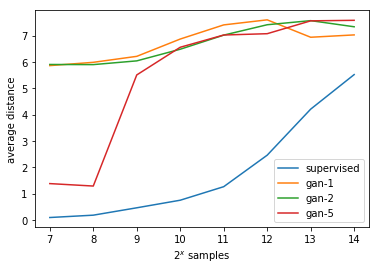

In [76]:
def read(file_name):
    reader = open(file_name, 'r')
    iter_list, value_list = [], []
    while True:
        line = reader.readline().split()
        if len(line) == 0:
            break
        iter_list.append(int(line[0]))
        value_list.append(float(line[-1]))
    return iter_list, value_list
    
root_path = '/home/zsj/atlas/AdversarialOptim/log'
setting_names = ['supervised', 'gan-1', 'gan-2', 'gan-5']
settings = ['supervised_gen/%d', 
            'gan/random/model=bernoulli-zdim=%d-zadd=10-lr=-3.00-rep=1',
            'gan/random/model=bernoulli-zdim=%d-zadd=10-lr=-4.00-rep=2',
            'gan/random/model=bernoulli-zdim=%d-zadd=10-lr=-3.00-rep=5',
            'gan/random/model=bernoulli-zdim=%d-zadd=10-lr=-4.00-rep=10',
            'vae/random/model=gaussian-zdim=%d-zadd=20-lr=-4.00-beta=0.01',
            'vae/random/model=gaussian-zdim=%d-zadd=20-lr=-4.00-beta=1.00']
for name, setting in zip(setting_names, settings):
    zdim_list = []
    dist_list = []
    for i in range(20):
        log_path = os.path.join(root_path, setting % i)
        if os.path.isdir(log_path):
            iter_list, value_list = read(os.path.join(log_path, 'result.txt'))
            zdim_list.append(i)
            dist_list.append(np.mean(value_list[np.argmax(np.array(iter_list) > 100000)]))
    plt.plot(zdim_list, dist_list, label=name, hold=True)
plt.legend()
plt.xlabel(r'$2^x$ samples')
plt.ylabel('average distance')
plt.show()
#             plt.plot(iter_list, value_list)
#             plt.show()